In [1]:
import sys
import os
import random

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

# Diffusion, RD, and ACP

In [2]:
n_biomarker_stages = 3
model_type = 'acp'

# generate the canonical model
seed = random.randint(0,1000)
print(seed)
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=302)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

446
k_ij: [-0.64731881  0.35576012 -0.82139741]
gamma: [0.6 0.6 0.6]
eta:[0.9 0.9 0.9]


ValueError: shapes (3,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [3]:
# ACP No Prior
analyzer = DiseaseProgressionAnalyzer(patient_samples)

import numpy as np
if np.any(np.isinf(analyzer.X)):
    print("There is a Nan")

In [4]:
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

ValueError: zero-size array to reduction operation minimum which has no identity

100%|██████████| 10000/10000 [00:02<00:00, 3730.72it/s]


Greedy Ascent Result: [3 5 7 6 8 9 4 2 0 1]


100%|██████████| 500000/500000 [02:15<00:00, 3690.39it/s]


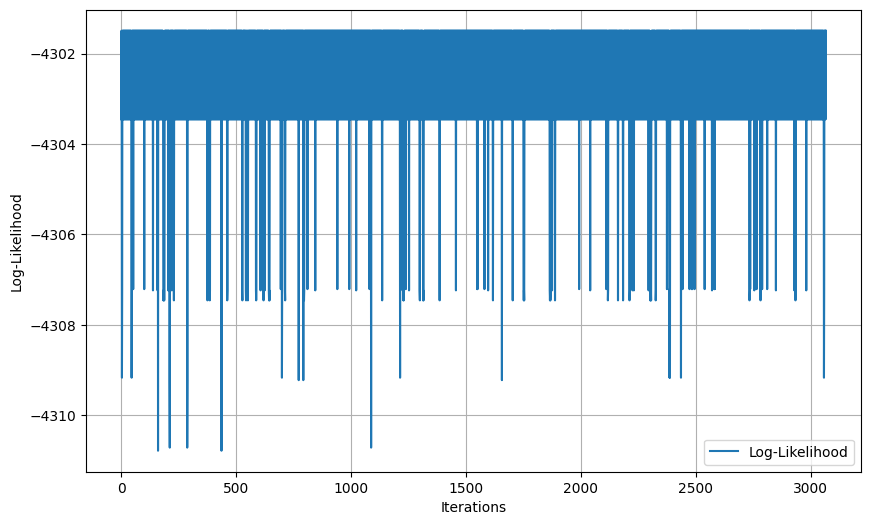

AttributeError: 'NoneType' object has no attribute 'summary'

In [5]:
# ACP w/ Prior
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

## DIFFUSION MODEL

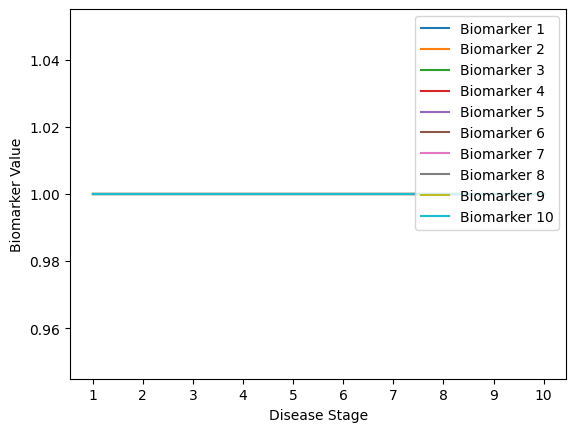

In [14]:
n_biomarker_stages = 10
model_type = 'diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=3)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [ ]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = prior)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

## REACTION DIFFUSION

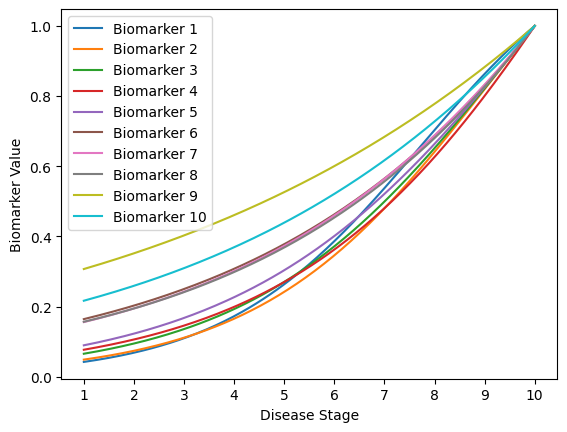

In [9]:
n_biomarker_stages = 10
model_type = 'reaction_diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=10)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=10, skewness=-1)
patient_samples = sample_generator.patient_samples

In [10]:
# RD No Prior
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3694.32it/s]


Greedy Ascent Result: [5 9 0 7 2 3 1 4 6 8]


100%|██████████| 500000/500000 [02:17<00:00, 3646.63it/s]

Best Order: [5 9 0 7 2 3 1 4 6 8]
Spearman's Rho: None
Kendall's Tau: 0.1111111111111111


In [11]:
# RD w/ Prior
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3680.42it/s]


Greedy Ascent Result: [5 9 0 7 2 3 1 4 6 8]


100%|██████████| 500000/500000 [02:16<00:00, 3670.36it/s]


AttributeError: 'NoneType' object has no attribute 'summary'

## ODE demo

self.time_points length: 203, self.model_values[0] length: 203
self.time_points length: 203, self.model_values[1] length: 203
self.time_points length: 203, self.model_values[2] length: 203
self.time_points length: 203, self.model_values[3] length: 203
self.time_points length: 203, self.model_values[4] length: 203
self.time_points length: 203, self.model_values[5] length: 203
self.time_points length: 203, self.model_values[6] length: 203
self.time_points length: 203, self.model_values[7] length: 203
self.time_points length: 203, self.model_values[8] length: 203
self.time_points length: 203, self.model_values[9] length: 203


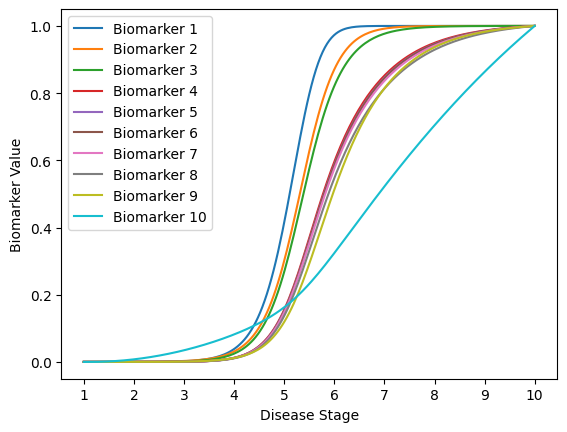

In [6]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 10
model_type = 'logistic'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, random_state=11)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [7]:
# Logistic No Priors
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3681.94it/s]


Greedy Ascent Result: [0 1 2 5 8 6 7 3 4 9]


100%|██████████| 500000/500000 [02:22<00:00, 3520.50it/s]

Best Order: [0 1 2 3 8 6 4 5 7 9]
Spearman's Rho: None
Kendall's Tau: 0.7333333333333333


In [8]:
analyzer_prior = DiseaseProgressionAnalyzer(patient_samples)
analyzer_prior.set_prior(prior = prior)
likelihood_matrix_prior = analyzer.run_analysis('ebm')
analyzer_prior.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3500.36it/s]


Greedy Ascent Result: [0 1 2 3 8 6 4 5 7 9]


100%|██████████| 500000/500000 [02:24<00:00, 3468.17it/s]


AttributeError: 'NoneType' object has no attribute 'summary'